<img src="img/dfnavn1.jpg" width="550">

### Oppgave 3:


Under har vi et lite pandas dataframe.
![oppg1](img/dataframe_oppg3.png)

Prøv å lage tabellen ved å bruke metodene over



### Series
* Vi lagde pandas `Series` med `pd.Series(data=None, index=None, dtype=None, name=None, copy=None)`
* Når argumentene står som feks `index = None` betyr det at den ikke er obligatorisk å ha med når vi lager et `Series`-objekt
* Dersom vi ikke tar de med får de verdien `None` som «default»

In [1]:
import pandas as pd
import numpy as np

indeks = range(2010,2014)
arbeidsledighet = pd.Series(data=[0.02, 0.023, 0.026, 0.031], index=indeks, name="Arbeidsledighet")

#vi kan droppe data=..., index=... så lenge vi gir data i riktig rekkefølge
konkurser = pd.Series([100,120,250,180], indeks, name="Konkurser") 

#Det er ofte lurt å ha viktige argumenter til series som egne variabler
BNPdata = np.array([2e6, 3e6, 1.8e6, 1.5e6])
BNP = pd.Series(BNPdata, indeks, name="BNP", copy=True)

# Ofte er data til Series eller DataFrame ikke kopiert inn -- men lagret som referanser til originaldata
BNPdata[0] = 2.1e6
BNP

2010    2000000.0
2011    3000000.0
2012    1800000.0
2013    1500000.0
Name: BNP, dtype: float64

### DataFrame

* Vi lagde pandas dataframes med `pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)`
* Her er `columns` nytt -- den gir navnene til kolonnene i "tabellen" vår dersom de mangler fra `data`
* Dersom kolonnenavnene er gitt fra `data` bruker vi `columns` til å velge ut hvilke kolonner vi vil ha i dataframet vårt

### DataFrame-- data

* `data` til Series var 1-dimensjonal, men i en dataframe må vi oppgi (sannsynligvis) flere dataserier som kolonner
* Den mest vanlige måten er med en dictionary: ` data = {"Kolonne1": data1, "Kolonne2": data2, ... }`
* Dersom vi har en rekke `Series` som beskriver *radene* har vi `data = [rad1, rad2, ....]` hvor `rad1` er en `Series`

In [2]:
#Lag datavariabel til dataframe
oppg3_data = {arbeidsledighet.name: arbeidsledighet, 
             konkurser.name: konkurser,
             BNP.name: BNP}

#Lag dataframe
oppg3_df = pd.DataFrame(oppg3_data)
oppg3_df

,Arbeidsledighet,Konkurser,BNP
2010,0.020,100,2000000.0
2011,0.023,120,3000000.0
2012,0.026,250,1800000.0
2013,0.031,180,1500000.0


## Hente ut eller endre deler av DataFrame/Series

* Når vi har lagt til dataen vår in en dataframe, trenger vi å kunne slå opp i den
* Enten vi vil endre eller bare lese dataene, er det forholdsvis mange måter på gjøre dette på

### Series
* Vi Kan slå opp med label (etikketter i index) eller med radnummer
* Det kjappeste er å bruke `s["label"]` eller `s[index]` for å slå opp dataen på «label» eller indeks i serien `s`

In [3]:
#Lagre verdi i serie som varibel
BNP_2011 = BNP[2011]
print("BNP i 2011 var", BNP_2011)

BNP i 2011 var 3000000.0


In [4]:
#Endre verdi i serie
BNP[2011] = 7e6
BNP 

2010    2000000.0
2011    7000000.0
2012    1800000.0
2013    1500000.0
Name: BNP, dtype: float64

In [5]:
# Series med tekstreng etiketter
s = pd.Series([10, 20, 30, 40, 50, 60], index=['a', 'b', 'c', 'd', 'e', 'f'])
s['a'] = 100 # Modifiserer verdi på label 'a'
s

a    100
b     20
c     30
d     40
e     50
f     60
dtype: int64

* Dersom vi heller vil bruke nummeret enn etikketten bruker vi .iloc(...)

In [6]:
# Datapunkt nummer 2
BNP.iloc[1]

7000000.0

* Vi kan slå opp i flere verdier samtidig ved å gi en liste
  * `s[["label2", "label4"]]` eller `s[[indeks2, indeks4]]`
  * `s.iloc[[indeks4,indeks6]]`

In [7]:
#Hent BNP i 2011 og 2013
print(BNP[[2011, 2013]])
#Hent fra indexetiketter 'a' og 'c'
print(s[['a', 'c']])
#Hent fra indexnummer 0 og 2
print(BNP.iloc[[0,2]])

2011    7000000.0
2013    1500000.0
Name: BNP, dtype: float64
a    100
c     30
dtype: int64
2010    2000000.0
2012    1800000.0
Name: BNP, dtype: float64


#### Skjæring/Slicing
* Ofte vil vi slå opp en rekke eller et spenn med verdier -- feks alle mellom 1995 og 2000
* Da kan vi *skjære* eller *slice*
* Vi slicer på samme måter som vanlige lister `s[start:stop]`
* Start/stop kan være indekser eller etiketter

In [8]:
# fra 'b' til og med 'e'
print(s['b':'e'])
# fra 1 til men IKKE med 5
print(s.iloc[1:5])

b    20
c    30
d    40
e    50
dtype: int64
b    20
c    30
d    40
e    50
dtype: int64


Tabellen under oppsummerer flere måter å slå opp i `Series`-objekter på 

| Operasjon                            | Syntaks / Metode                                   | Eksempelkode                                                 | Beskrivelse                                                                 |
|--------------------------------------|----------------------------------------------------|--------------------------------------------------------------|-----------------------------------------------------------------------------|
| Tilgang til et element med indeksering| `s[index]`                                         | `s[0]`                                                       | Returnerer verdien på den spesifikke posisjonen (0-indeksert).              |
| Tilgang til et element med etikett    | `s['label']`                                       | `s['Alice']`                                                 | Returnerer verdien for det spesifikke etikettenavnet.                       |
| Tilgang til flere elementer (liste)   | `s[[index1, index2]]`                              | `s[[0, 2]]`                                                  | Returnerer en ny Serie med verdier for de spesifikke posisjonene.           |
| Tilgang til flere elementer (etiketter)| `s[['label1', 'label2']]`                          | `s[['Alice', 'Bob']]`                                        | Returnerer en ny Serie med verdier for de spesifikke etikettene.            |
| Tilgang til verdi med `.at[]`         | `s.at['label']`                                    | `s.at['Bob']`                                                | Henter en enkelt verdi ved å bruke etikett.                                 |
| Tilgang til verdi med `.iat[]`        | `s.iat[index]`                                     | `s.iat[1]`                                                   | Henter en enkelt verdi ved å bruke indeksposisjon.                          |
| Skjæring (slicing) med etiketter      | `s['start_label':'end_label']`                     | `s['Alice':'Charlie']`                                       | Returnerer verdiene mellom start- og sluttetiketten (inklusiv).             |
| Skjæring (slicing) med indeksering    | `s[start_index:end_index]`                         | `s[0:2]`                                                     | Returnerer verdiene mellom start- og sluttindeks (slutten eksklusiv).       |
| Betinget valg                        | `s[s > value]`                                     | `s[s > 25]`                                                  | Returnerer verdier der betingelsen er oppfylt.                              |
| Tilgang med flere betingelser         | `s[(s > value1) & (s < value2)]`                   | `s[(s > 25) & (s < 35)]`                                     | Returnerer verdier der begge betingelser er oppfylt (`&` for OG).           |
| Verdier i en liste                   | `s[s.isin([list_of_values])]`                      | `s[s.isin([25, 35])]`                                        | Returnerer verdier som er i den oppgitte listen.                            |
| Tilgang til elementer med `.loc[]`    | `s.loc['label']` eller `s.loc[start:end]`          | `s.loc['Alice']` eller `s.loc['Alice':'Charlie']`            | Returnerer verdier med etiketter eller skjæring.                            |
| Tilgang til elementer med `.iloc[]`   | `s.iloc[index]` eller `s.iloc[start:end]`          | `s.iloc[1]` eller `s.iloc[0:2]`                              | Returnerer verdier med indeksering eller skjæring.                          |



* Fra tabellen ser vi at man kan både bruke `s["label"]` og `s.loc["label"]`
* Med `.loc[]` mener vi eksplisitt at vi skal bruke label, mens `[]` er litt tvetydig
* Med og uten `s[..]` og `s.loc[...]` er identiske i bruk, bortsett fra med slicing
* `s.loc[start:stop]` er fra start til og med stop, mens `s[start:stop]` er fra start til men IKKE med stop
* Andre rare forskjeller kan forekomme, så test begge om rare ting foregår

In [9]:
BNP.index #BNP har en RangeIndex index
print(BNP[2011:2014]) #Returnerer ingenting
print(BNP.loc[2011:2013])#Funker som forventet fra/til og med
print(BNP[0:3]) # [] vet ikke om den skal bruke labels eller indeks -- .loc[] gjør det tydelig at det er med labels

Series([], Name: BNP, dtype: float64)
2011    7000000.0
2012    1800000.0
2013    1500000.0
Name: BNP, dtype: float64
2010    2000000.0
2011    7000000.0
2012    1800000.0
Name: BNP, dtype: float64


### DataFrames
* Med DataFrames har vi 2-dimensjonal data.
  * Vi trenger å velge kolonner
  * Vi trenger å velge rader
  * Vi trenger å velge et datapunkt på en (rad, kolonne)

#### Kolonner
* Vi bruker nå `df["kolonne"]` for å velge en kolonne (Gir en Series)
* Eventuelt `df[["kolonne2", "kolonne4", ...]]` for å velge flere kolonner (Gir et DataFrame)

In [10]:
df = oppg3_df
df 

,Arbeidsledighet,Konkurser,BNP
2010,0.020,100,2000000.0
2011,0.023,120,3000000.0
2012,0.026,250,1800000.0
2013,0.031,180,1500000.0


In [11]:
print(df["Arbeidsledighet"])#Velg 1 kolonne
print(df[["Arbeidsledighet", "BNP"]])# Velg flere kolonner
#df[["Arbeidsledighet", "BNP"]]

2010    0.020
2011    0.023
2012    0.026
2013    0.031
Name: Arbeidsledighet, dtype: float64
      Arbeidsledighet        BNP
2010            0.020  2000000.0
2011            0.023  3000000.0
2012            0.026  1800000.0
2013            0.031  1500000.0


#### Rader
* For de fleste andre operasjoner kan vi bruke en variant med `.loc[]`
* For å velge en eller flere rader, feks:

In [12]:
print(df.loc[2010])# Rad med indeks 2010
print(df.loc[[2010, 2012]]) # []-liste med indekser for å få flere rader
df.loc[2011:2013] #Slicing av rader fra -> til og med
    

Arbeidsledighet          0.02
Konkurser              100.00
BNP                2000000.00
Name: 2010, dtype: float64
      Arbeidsledighet  Konkurser        BNP
2010            0.020        100  2000000.0
2012            0.026        250  1800000.0


,Arbeidsledighet,Konkurser,BNP
2011,0.023,120,3000000.0
2012,0.026,250,1800000.0
2013,0.031,180,1500000.0


#### Rader og Kolonner
* Vi bruker også gjerne `.loc[]` nå man velger både rader og kolonner
* Det har former som:
  * `df.loc[rad, kolonne]` gir datapunkt på rad "rad" og i kolonne "kolonne"
  * `df.loc[start:stop, kolonne]` gir rader fra start til og med stop og verdier i kolonne "kolonne"
  * `df.loc[:, ["kolonne1", "kolonne2"]]` gir alle rader, og kolonner "kolonne1" og "kolonne2"

In [13]:
print("BNP i 2011 er:", df.loc[2011, "BNP"])
df.loc[2011:2013, "Arbeidsledighet"]#Arbeidsledighet i årene 2011 til og med 2013
df.loc[2012:2013, ["Arbeidsledighet", "BNP"]] # Arbeidsledighet og BNP, alle rader


BNP i 2011 er: 3000000.0


,Arbeidsledighet,BNP
2012,0.026,1800000.0
2013,0.031,1500000.0


#### Tabell: Oppslag i dataframe

| Operasjon                            | Syntaks / Metode                                  | Eksempelkode                                              | Beskrivelse                                                                 |
|--------------------------------------|---------------------------------------------------|------------------------------------------------------------|-----------------------------------------------------------------------------|
| Tilgang til en kolonne               | `df['kolonnenavn']`                               | `df['alder']`                                               | Returnerer en Serie av den valgte kolonnen.                                 |
| Tilgang til flere kolonner           | `df[['kolonne1', 'kolonne2']]`                    | `df[['alder', 'lønn']]`                                     | Returnerer en DataFrame av de valgte kolonnene.                             |
| Tilgang til en rad med `.loc[]`      | `df.loc[indeks]`                                  | `df.loc[0]`                                                 | Returnerer en Serie for den spesifiserte raden ved etikett eller indeks.    |
| Tilgang til en rad med `.iloc[]`     | `df.iloc[posisjon]`                               | `df.iloc[3]`                                                | Returnerer en Serie for den spesifiserte raden basert på posisjon (0-indeksert). |
| Tilgang til en enkelt verdi med `.at[]`| `df.at[rad_label, 'kolonne']`                 | `df.at[0, 'alder']`                                         | Henter en enkelt verdi ved hjelp av rad- og kolonneetiketter.               |
| Tilgang til en enkelt verdi med `.iat[]`| `df.iat[rad_posisjon, kolonne_posisjon]`        | `df.iat[0, 2]`                                              | Henter en enkelt verdi ved å bruke heltallsposisjoner for rader og kolonner.|
| Valg med betingelse                  | `df[df['kolonne'] == verdi]`                      | `df[df['alder'] > 30]`                                      | Returnerer rader der betingelsen er oppfylt.                                |
| Slicing av rader med `.loc[]`        | `df.loc[start_rad:slutt_rad, :]`                    | `df.loc[1:3, :]`                                            | Returnerer et utvalg av rader basert på radetiketter (inklusiv).            |
| Slicing av rader og kolonner med `.loc[]`| `df.loc[start_rad:slutt_rad, 'kol1':'kol3']`      | `df.loc[1:3, 'alder':'lønn']`                               | Returnerer et utvalg av rader og kolonner ved bruk av etiketter (inklusiv). |
| Slicing av rader med `.iloc[]`       | `df.iloc[start_pos:slutt_pos]`                      | `df.iloc[1:4]`                                              | Returnerer et utvalg av rader basert på posisjon (eksklusiv ende).          |
| Slicing av rader og kolonner med `.iloc[]`| `df.iloc[start_rad:slutt_rad, start_kol:slutt_kol]` | `df.iloc[1:4, 1:3]`                                         | Returnerer et utvalg av rader og kolonner basert på posisjon (eksklusiv ende).|
| Boolske indekser                     | `df[df['kolonne'] > verdi]`                       | `df[df['lønn'] > 50000]`                                    | Filtrerer rader basert på en betingelse.                                    |
| Tilgang med flere betingelser        | `df[(df['kol1'] > verdi1) & (df['kol2'] == verdi2)]` | `df[(df['alder'] > 30) & (df['kjønn'] == 'Mann')]`       | Returnerer rader der begge betingelser er oppfylt (`&` for OG, `|` for ELLER). |
| Kolonneverdi i en liste              | `df[df['kolonne'].isin([liste_av_verdier])]`      | `df[df['by'].isin(['Oslo', 'Bergen'])]`                     | Returnerer rader der kolonneverdien er i den oppgitte listen.               |



#### Viktigste å huske:
* `df.loc[1995, "populasjon"]` slå opp på rad 1995 i kolonne "populasjon"
* `df.loc[:, ["populasjon", "utflytting"]` Hent ut alle rader, og kolonner "populasjon" og "utflytting"
* `df.loc[1987:2002, "populasjon"]` Slå opp på rader fra 1987 til 2002 i kolonnen "populasjon"

* `df.loc[rad,kolonne]` rad/kolonne kan være:
  * Enkeltverdi: 0, 12, 2002, "Populasjon", "Ålesund", ...
  * Slice: 1994:2002, "Populasjon":"Innflytting", "Adam":"Åge", 1994::
  * Liste: ["Ålesund", "Molde", "Trondheim"], [1994, 1997, 2000]

## Viktige metoder/funksjoner for dataframes:
| **Funksjon/Metode**  | **Beskrivelse**                                                                                   | **Eksempel**                                |
|----------------------|---------------------------------------------------------------------------------------------------|---------------------------------------------|
| `df.astype()`        | Konverterer datatypen til kolonner.                                                                | `df['kolonne'].astype('int')`              |
| `df.rename()`        | Omdøper etiketter for rader eller kolonner.                                                        | `df.rename(columns={'gammel':'ny'})`       |
| `df.insert()`        | Setter inn en ny kolonne på en spesifisert posisjon.                                               | `df.insert(2, 'ny_kolonne', verdier)`      |
| `df.replace()`      | Erstatter verdier med en annen verdi                                                                | `df.replace("Ingen verdi", np.nan)`        |  
| `df.transpose()`     | Transponerer DataFrame (rader blir kolonner og omvendt).                                           | `df.transpose()` eller `df.T`              |
| `df.drop()`          | Fjerner spesifiserte etiketter fra rader eller kolonner.                                           | `df.drop(columns=['kolonne'])`             |
| `df.set_index()`     | Angir en kolonne som den nye indeksen.                                                             | `df.set_index('kolonne')`                  |
| `df.reset_index()`   | Tilbakestiller indeksen og gjør den om til en kolonne igjen.                                       | `df.reset_index(drop=False)`               |
| `df.sort_values()`   | Sorterer DataFrame etter verdier i én eller flere kolonner.                                        | `df.sort_values(by='kolonne')`             |
| `df.sort_index()`    | Sorterer DataFrame etter indeks.                                                                   | `df.sort_index()`                          |
| `df.apply()`         | Bruker en funksjon langs en akse (rader eller kolonner).                                           | `df.apply(np.mean, axis=1)`                |
| `df.filter()`        | Subsetter DataFrame basert på spesifiserte etiketter for rader eller kolonner.                     | `df.filter(items=['kolonne1', 'kolonne2'])`|
| `df.groupby()`       | Grupperer DataFrame ved hjelp av en mapper eller etter kolonner.                                   | `df.groupby('kolonne').sum()`              |
| `df.pivot_table()`   | Oppretter en pivot-tabell for DataFrame.                                                           | `df.pivot_table(verdier, indeks, kolonner)`|
| `df.melt()`          | Konverterer DataFrame fra bredt til langt format.                                                  | `df.melt(id_vars, value_vars)`             |
| `df.merge()`         | Slår sammen DataFrame-objekter ved bruk av en database-lignende join.                              | `df.merge(df2, on='nøkkel')`               |
| `df.join()`          | Slår sammen kolonner fra en annen DataFrame ved bruk av indeks.                                    | `df.join(df2)`                             |
| `df.dropna()`        | Fjerner manglende verdier.                                                                         | `df.dropna()`                              |
| `df.fillna()`        | Fyller inn manglende verdier med en spesifisert verdi eller metode.                                | `df.fillna(0)`                             |
| `df.isna()`          | Oppdager manglende verdier og returnerer en DataFrame med booleanske verdier.                      | `df.isna()`                                |
| `df.duplicated()`    | Returnerer en booleansk DataFrame som indikerer om hver rad er en duplikat.                        | `df.duplicated()`                          |
| `df.corr()`          | Beregner parvise korrelasjoner mellom kolonner.                                                    | `df.corr()`                                |
| `df.describe()`      | Gir en statistisk oppsummering av DataFrame, inkludert gjennomsnitt, min, maks, med mer.           | `df.describe()`                            |
| `df.info()`          | Viser en kort oppsummering av DataFrame (som typer, ikke-null verdier).                            | `df.info()`                                |
| `df.value_counts()`  | Teller unike verdier i en kolonne.                                                                 | `df['kolonne'].value_counts()`             |
| `df.head()`          | Returnerer de første `n` radene i DataFrame (standard er 5).                                       | `df.head(10)`                              |
| `df.tail()`          | Returnerer de siste `n` radene i DataFrame (standard er 5).                                        | `df.tail(10)`                              |


## Manipulere og «preppe» DataFrames
La oss si at vi har hentet data fra en datakilde, feks SSB, og lastet det inn som et `DataFrame`
* Typisk må vi preppe, vaske, og rydde opp i dataen vår før vi bruker den:
  * Vi må kanskje fikse opp datatypene
  * Vi må erstatte verdier feks '...' må gjøres om til `np.NaN`
  * Vi må kanskje formatere dataene, feks fra tekststrenger som "2.1%" til "0.021" som flyttal
  * Vi vil kanskje fjerne noen rader eller kolonner
  * Kanskje vi vil legge til nye kolonner
  * Vi vil kanskje gi nye navn til kolonner
  * +++ mange andre ting (reindeksere, sortere, pivotere, interpolere osv.)

Vi skal se på noen av de viktigste.

Anta at vi har hentet inn dataen under

In [14]:
import pandas as pd
import numpy as np

# Dictionary med kundedata
data = {
    'CustomerID': [101, 102, 103, 104, 105, 106, 107, 107],  # Duplikat CustomerID (107)
    'Name': ['Alice', 'Bob', 'Charlie', 'David', "...", 'Eve', 'Frank', 'Frank'],  # Mangler navn for ID 105
    'Age': [25, "...", 35, 45, 28, 30, 29, 29],  # Mangler alder for ID 102
    'Income': [50000, 60000, 45000, "...", 52000, "...", 58000, 58000],  # Manlger inntekt for IDs 104, 106
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'Tax Bracket': ['22.5%', '25.2%', '17.8%', '32.5%', '37.4%', '52.7%', '22.1%', '22.1%']
}

#Lag dataframe
df = pd.DataFrame(data)

#Viser dataframe
print("Dataframe før prepping")
df

Dataframe før prepping


,CustomerID,Name,Age,Income,Gender,Tax Bracket
0,101,Alice,25,50000,Female,22.5%
1,102,Bob,...,60000,Male,25.2%
2,103,Charlie,35,45000,Male,17.8%
3,104,David,45,...,Male,32.5%
4,105,...,28,52000,Female,37.4%
5,106,Eve,30,...,Female,52.7%
6,107,Frank,29,58000,Male,22.1%
7,107,Frank,29,58000,Male,22.1%


### Erstatte verdier og ordne datatyper
* I dataframet vårt er det brukt "..." for å representere manglende data
* I pandas bruker vi `np.nan`
* Vi kan bruke `df.replace()` til å endre dette

In [15]:
#df.replace(to_replace='...', value=np.nan) #Angi verdi direkte
df.replace(to_replace={"...": np.nan, "..": np.nan})#Angi mange verdier med dictionary
df

/tmp/ipykernel_2174719/1463314665.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace={"...": np.nan, "..": np.nan})#Angi mange verdier med dictionary


,CustomerID,Name,Age,Income,Gender,Tax Bracket
0,101,Alice,25,50000,Female,22.5%
1,102,Bob,...,60000,Male,25.2%
2,103,Charlie,35,45000,Male,17.8%
3,104,David,45,...,Male,32.5%
4,105,...,28,52000,Female,37.4%
5,106,Eve,30,...,Female,52.7%
6,107,Frank,29,58000,Male,22.1%
7,107,Frank,29,58000,Male,22.1%


Vi legger merke til følgende:
* `df.replace()`gir en advarsel
* `df.replace()` ser ut til å gjøre det den skal
* Når vi viser dataframet på nytt er ikke endringene gjort 

* Advarsel forteller oss at python/pandas automatisk har fikset opp i datatypene

In [16]:
pd.set_option('future.no_silent_downcasting', True) #Kvitter oss med feilmelding
df.replace(to_replace={"...": np.nan, "..": np.nan}).infer_objects()#Erstatter "..." og fikser datatyper

,CustomerID,Name,Age,Income,Gender,Tax Bracket
0,101,Alice,25.0,50000.0,Female,22.5%
1,102,Bob,NaN,60000.0,Male,25.2%
2,103,Charlie,35.0,45000.0,Male,17.8%
3,104,David,45.0,NaN,Male,32.5%
4,105,NaN,28.0,52000.0,Female,37.4%
5,106,Eve,30.0,NaN,Female,52.7%
6,107,Frank,29.0,58000.0,Male,22.1%
7,107,Frank,29.0,58000.0,Male,22.1%


* Vi bruker `df.dtypes` til å se datatypene i dataframe
* Merk at vi kan kjøre mange operasjoner etter hverandre `df.rename().replace().drop()`

* Som regel gjør slike operasjoner ikke noe med det originale dataframet
* Den lager heller et nytt et (Det er det som blir printet ut)
* For å oppdatere endringene kan vi:
  * `df = df.replace(....)` Oppdatere gammel variabel
  * `df.replace(...., inplace=True)` Eller sette `inplace = True` (Da gjøres operasjonene på selve dataframen)

In [17]:
df = df.replace(to_replace={"...": np.nan}).infer_objects() # Gjør endringer og oppdaterer df
df.dtypes #Nye datatyper

CustomerID       int64
Name            object
Age            float64
Income         float64
Gender          object
Tax Bracket     object
dtype: object

### Caste om datatyper
* Tekst blir ofte lagret som `object`, men dersom vi vet at der kun skal være tekst bør vi lagre det med datatypen `string`
* Vi ser at `Age` har typen "float64", her kan vi heller bruke heltall, feks "int16"

* Vi kan bruke `df.astype("datatype")` til å gjøre om datatyper
* Eksempelet over forandrer alle datatyper i DataFrame
* Vi kan også velge ut en kolonne:
  * `df.astype({"kolonne3": "datatype"}, inplace=True)`
  * `df["kolonne"] = df["kolonne"].astype("datatype")`
* I det første eksempelet gir vi .astype en dictionary med {"kolonnenavn": "datatype"} for alle kolonnen vi vil endre

In [18]:
print("datatyper:\n", df.dtypes)
#df.astype("string") #Gjør alt om til strings!
df["Name"] = df["Name"].astype("string") #Gjør om "Name" kolonne til string
df = df.astype({"Age": "Int16", "Gender": "string"})#Gjør om Age og Gender til Int16 og string
df

datatyper:
 CustomerID       int64
Name            object
Age            float64
Income         float64
Gender          object
Tax Bracket     object
dtype: object


,CustomerID,Name,Age,Income,Gender,Tax Bracket
0,101,Alice,25,50000.0,Female,22.5%
1,102,Bob,<NA>,60000.0,Male,25.2%
2,103,Charlie,35,45000.0,Male,17.8%
3,104,David,45,NaN,Male,32.5%
4,105,<NA>,28,52000.0,Female,37.4%
5,106,Eve,30,NaN,Female,52.7%
6,107,Frank,29,58000.0,Male,22.1%
7,107,Frank,29,58000.0,Male,22.1%


*Merk: Det er forskjell på "int16" (numpy) og "Int16" (pandas). Numpy sin versjon mangler en måte å representere manglende data, derfor har pandas egen versjon*


### Manglende data
Dersom vi mangler data kan vi:
* Fjerne rader eller kolonner med manglende data
* Fylle inn en bestemt verdi
* Gjøre en slags interpolasjon (sette inn manglende data basert på feks datapunktene før og etter)
  

#### Fylle inn verdi
* `df.fillna(verdi)` fyller inn en `verdi` for alle manglende datapunkt
* `df["kolonne"].fillna(verdi)` fyller inn for manglende verdier i "kolonne"

In [19]:
df.isna()#Oppdager manglende verdier for dataframe
df["Age"].isna()#Oppdager manglende verdier for Series

ny_alder = df["Age"].fillna(int(df["Age"].mean())) #Vi fyller inn gjennomsnittsalder for manglende aldre
df["Age"] = ny_alder
df

,CustomerID,Name,Age,Income,Gender,Tax Bracket
0,101,Alice,25,50000.0,Female,22.5%
1,102,Bob,31,60000.0,Male,25.2%
2,103,Charlie,35,45000.0,Male,17.8%
3,104,David,45,NaN,Male,32.5%
4,105,<NA>,28,52000.0,Female,37.4%
5,106,Eve,30,NaN,Female,52.7%
6,107,Frank,29,58000.0,Male,22.1%
7,107,Frank,29,58000.0,Male,22.1%


In [20]:
minimum = df["Income"].min() #minimumsinntekt
df["Income"] = df["Income"].fillna(minimum) #Erstatte manglende lønn med minste lønn

In [21]:
df

,CustomerID,Name,Age,Income,Gender,Tax Bracket
0,101,Alice,25,50000.0,Female,22.5%
1,102,Bob,31,60000.0,Male,25.2%
2,103,Charlie,35,45000.0,Male,17.8%
3,104,David,45,45000.0,Male,32.5%
4,105,<NA>,28,52000.0,Female,37.4%
5,106,Eve,30,45000.0,Female,52.7%
6,107,Frank,29,58000.0,Male,22.1%
7,107,Frank,29,58000.0,Male,22.1%


#### Fjerne rader/kolonner med mangler
* Noen ganger er det OK å fylle inn en eller annen verdi for manglende datapunkter
* Andre ganger blir det helt feil å "dikte opp" data
* Da må vi enten la de stå, eller fjerne de

* Vi kan fjerne manglende data med `df.dropna(axis=0)` for hele dataframe
* Eller `s.dropna()` for en Series, ie `df.["kolonne"].dropna()`
* `axis` her forteller om vi skal droppe raden eller kolonnen med manglende data
* `axis=0` for rad og `axis=1` for kolonne

In [22]:
df.dropna(axis=1)#Dropper kolonner
df.dropna(axis=0, inplace=True)# axis=0, default, dropper rader
df


,CustomerID,Name,Age,Income,Gender,Tax Bracket
0,101,Alice,25,50000.0,Female,22.5%
1,102,Bob,31,60000.0,Male,25.2%
2,103,Charlie,35,45000.0,Male,17.8%
3,104,David,45,45000.0,Male,32.5%
5,106,Eve,30,45000.0,Female,52.7%
6,107,Frank,29,58000.0,Male,22.1%
7,107,Frank,29,58000.0,Male,22.1%


#### Interpolere
* Noen ganger kan man interpolere for å fylle inn manglende verdier
* Dersom feks folketallet er 10,000 i 1999 og 12,000 i 2001 er det en rimelig antakelse at folketallet var 11,000 i 2000
* Vi kan bruke `df.interpolate()` eller `df["kolonne"].interpolate()` for å interpolere hele dataframe, eller kun en kolonne
* Det er mange metoder man kan bruke for å interpolere, standard er 'linear' for linjær interpolasjon.
* Man kan også bruke feks kubisk interpolasjon -- `df.interpolate(method="cubic")`

Text(0.5, 1.0, 'Etter interpolasjon')

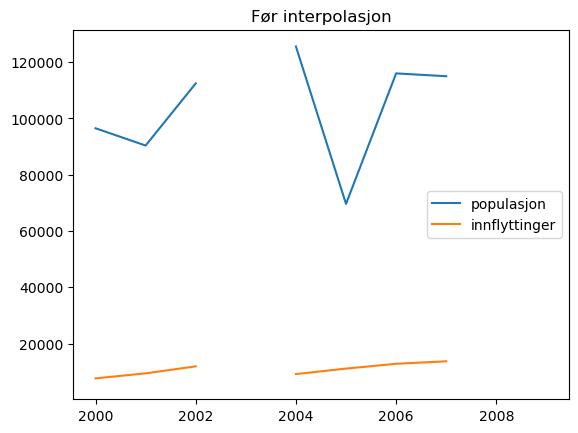

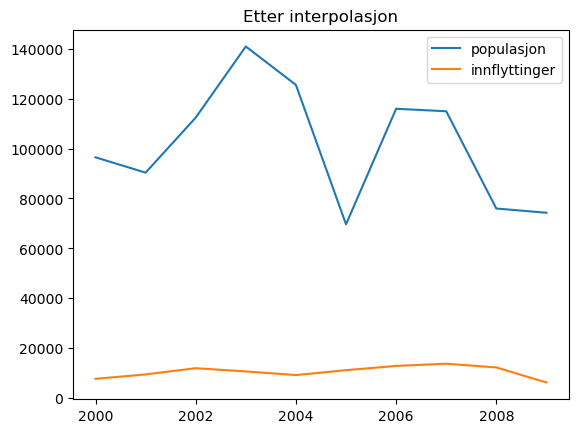

In [23]:
import matplotlib.pyplot as plt

pop = np.array([ 96500.93856734,  90363.04270208, 112429.36382302, np.nan,
       125544.71695161,  69633.98414487, 115983.80699903, 114977.31534508,
       np.nan,  74276.15092698])
innflyttinger = np.array([ 7666.28360188,  9446.22396195, 11933.314542  , np.nan,
        9183.3708486 , 11139.45988542, 12842.7452119 , 13724.65673835,
        np.nan,  6204.26244614])
t = [2000+i for i in range(10)]

df_pop = pd.DataFrame({"populasjon": pop, "innflyttinger": innflyttinger}, index=t)
df_pop.plot()
plt.title("Før interpolasjon")

df_pop.interpolate(method="cubic", inplace=True)
df_pop.plot()
plt.title("Etter interpolasjon")

### Skifte index

* Dersom vi vil bruke en av kolonnene som indeks kan vi bruke `df.set_index("kolonne")`
* Dersom vi ombestemmer oss kan vi bruke `df.reset_index()` for å gå tilbake

In [24]:
df.set_index("CustomerID", inplace=True) #Setter "CustomerID" til å være index
df

,Name,Age,Income,Gender,Tax Bracket
CustomerID,,,,,
101,Alice,25,50000.0,Female,22.5%
102,Bob,31,60000.0,Male,25.2%
103,Charlie,35,45000.0,Male,17.8%
104,David,45,45000.0,Male,32.5%
106,Eve,30,45000.0,Female,52.7%
107,Frank,29,58000.0,Male,22.1%
107,Frank,29,58000.0,Male,22.1%


In [25]:
df = df.reset_index() #Resetter index
df

,CustomerID,Name,Age,Income,Gender,Tax Bracket
0,101,Alice,25,50000.0,Female,22.5%
1,102,Bob,31,60000.0,Male,25.2%
2,103,Charlie,35,45000.0,Male,17.8%
3,104,David,45,45000.0,Male,32.5%
4,106,Eve,30,45000.0,Female,52.7%
5,107,Frank,29,58000.0,Male,22.1%
6,107,Frank,29,58000.0,Male,22.1%


In [26]:
#setter index igjen
df = df.set_index("CustomerID")

### Fjerne duplikater
* Dersom man har duplikate rader kan dette by på problemer eller være feil
* Vi kan fjerne de med `df.drop_duplicates()`

In [27]:
df.drop_duplicates() #Fjerner duplikater -- radene må være HELT like 

,Name,Age,Income,Gender,Tax Bracket
CustomerID,,,,,
101,Alice,25,50000.0,Female,22.5%
102,Bob,31,60000.0,Male,25.2%
103,Charlie,35,45000.0,Male,17.8%
104,David,45,45000.0,Male,32.5%
106,Eve,30,45000.0,Female,52.7%
107,Frank,29,58000.0,Male,22.1%


* Her krever vi at alle kolonnene er like
* Dersom vi kun skal se på et subset av kolonner bruker vi `df.drop_duplicates(subset=['kol1', 'kol2']`
* I vårt tilfelle vil vi kanskje fjerne duplikate ID-nummer, men dettee er nå blitt til indeksen
* I tillegg tar `drop_duplicate(keep = 'first'/'last'/'False') som forteller om man skal beholde henholdsvis først, siste eller ingen duplikate rader

In [28]:
# Vi resetter index, fjerner duplikate "customerID" og setter tilbake indeks til customer id
df = df.reset_index().drop_duplicates(subset=["CustomerID"]).set_index("CustomerID")
df
#Vi kan gjøre mange "operasjoner" ved å sette de sammen med en kjede av .operasjon1().operasjon2() ....

,Name,Age,Income,Gender,Tax Bracket
CustomerID,,,,,
101,Alice,25,50000.0,Female,22.5%
102,Bob,31,60000.0,Male,25.2%
103,Charlie,35,45000.0,Male,17.8%
104,David,45,45000.0,Male,32.5%
106,Eve,30,45000.0,Female,52.7%
107,Frank,29,58000.0,Male,22.1%


### Skifte navn på kolonner
* Dersom vi vil skifte kolonnenav, feks 'Name' til 'Firstname' bruker vi `df.rename(columns = {"gammeltnavn": "nyttnavn", ...})`
* Den tar enten en dictionary med gamlenavn: nyenavn som nøkkel/verdipaper -- (evt en funksjon som tar navn og gir nytt navn)

In [29]:
navneskifte = {"Name": "Firstname"} #Vi vil skifte kolonnenavn Name til Firstname
df = df.rename(columns=navneskifte)
df

,Firstname,Age,Income,Gender,Tax Bracket
CustomerID,,,,,
101,Alice,25,50000.0,Female,22.5%
102,Bob,31,60000.0,Male,25.2%
103,Charlie,35,45000.0,Male,17.8%
104,David,45,45000.0,Male,32.5%
106,Eve,30,45000.0,Female,52.7%
107,Frank,29,58000.0,Male,22.1%


### Endre verdier (apply/map)
* Dersom vi vil endre verdier i kolonne -- feks fra prosent til desimal -- kan vi gjøre dette med en løkke
* MEN - vi må iterere over indeksen til dataframe

In [30]:
df_copy = pd.DataFrame(df, copy=True) #Lager en kopi av dataframe
for prosent in df["Tax Bracket"]:
    prosent += " hei"
#FUNKER IKKE

#Vi må iterere over indeksen!
for index in df.index:
    df.at[index, "Tax Bracket"] += " hei"



#Det er styr med jupyter-notebook siden du jobber med celler som kjøres på nytt flere ganger
df_rot = df
df = df_copy
df_rot

,Firstname,Age,Income,Gender,Tax Bracket
CustomerID,,,,,
101,Alice,25,50000.0,Female,22.5% hei
102,Bob,31,60000.0,Male,25.2% hei
103,Charlie,35,45000.0,Male,17.8% hei
104,David,45,45000.0,Male,32.5% hei
106,Eve,30,45000.0,Female,52.7% hei
107,Frank,29,58000.0,Male,22.1% hei


* Merk at vi bruker `df.at[....]` i stedet for `df.loc[...]`
* Dette er fordi `df.at[..]` er spesiallaget til å slå opp i enkeltverdier
* `.loc[...]` må gjøre mange ting som slicing o.l. og er *tregere* i slike løkker

* Har du et stort dataset kan slike løkker være trege
* Det er raskere å bruke *vektoriserte operasjoner* eller `.apply()` (dataframes og series) eller `.map()` (kun series)
  * Skal vi feks doble alle tallene kan vi skrive `df["kolonne"] = df.["kolonne"]*2`
  * Maskinen vet da at den kan gjøre doblingene *parallelt* (samtidig)
* .apply() og .map() anvender funksjoner på alle elementene i en rad/kolonne, og er også raskere enn å itere med for

In [31]:
# Vi vil endre tax-bracket til desimaltall istedet for "21.5%" en tekststreng

#Funksjon som gjør om tekststrenger som "2.1%" til 0.021
def prosent_til_desimal(tekststreng):
    tall = tekststreng[:-1]
    return float(tall)/100

df["Tax Bracket"].map(prosent_til_desimal)# Kjører funksjonen over alle verdier i Tax Bracket (map)
df["Tax Bracket"] = df["Tax Bracket"].apply(prosent_til_desimal)# Kjører funksjonen over alle verdier i Tax Bracket (apply)
df

,Firstname,Age,Income,Gender,Tax Bracket
CustomerID,,,,,
101,Alice,25,50000.0,Female,0.225
102,Bob,31,60000.0,Male,0.252
103,Charlie,35,45000.0,Male,0.178
104,David,45,45000.0,Male,0.325
106,Eve,30,45000.0,Female,0.527
107,Frank,29,58000.0,Male,0.221


In [32]:
df

,Firstname,Age,Income,Gender,Tax Bracket
CustomerID,,,,,
101,Alice,25,50000.0,Female,0.225
102,Bob,31,60000.0,Male,0.252
103,Charlie,35,45000.0,Male,0.178
104,David,45,45000.0,Male,0.325
106,Eve,30,45000.0,Female,0.527
107,Frank,29,58000.0,Male,0.221


* `apply()` og `.map()` gjør det samme her
* `apply()` kan man bruke på hele dataframet (`df.apply(np.sqrt)`) tar kvadratrot av alle tallene i df)
* Eller på alle rader/kolonner (`df.apply(sum, axis=0/1)` summer sammen henholdsvis kolonner/rader og gir en Series med summene

### Legge til kolonner
* Vi legger til nye kolonner med `.insert(loc, column, value)` dersom vi vil ha kontroll på posisjonen til kolonnen
* loc (0,1,2,3,..) gir hvor kolonnen skal være, "column" er navnet til kolonnen og "value" er verdiene
* Dersom vi ikke bryr oss om hvor kolonnen står kan vi gjøre det litt som når vi legger til i dictionaries:
  * `df["nytt kolonne"] = kolonne_data`


In [33]:
last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia']
df.insert(1, "Lastname", last_names) #Legger til ny kolonne til høyre for "Firstname"
df

,Firstname,Lastname,Age,Income,Gender,Tax Bracket
CustomerID,,,,,,
101,Alice,Smith,25,50000.0,Female,0.225
102,Bob,Johnson,31,60000.0,Male,0.252
103,Charlie,Williams,35,45000.0,Male,0.178
104,David,Brown,45,45000.0,Male,0.325
106,Eve,Jones,30,45000.0,Female,0.527
107,Frank,Garcia,29,58000.0,Male,0.221


In [35]:
#Lager ny kolonne direkte
df["Income, After tax"] = df["Income"]-df["Income"]*df["Tax Bracket"]
df

,Firstname,Lastname,Age,Income,Gender,Tax Bracket,"Income, After tax"
CustomerID,,,,,,,
101,Alice,Smith,25,50000.0,Female,0.225,38750.0
102,Bob,Johnson,31,60000.0,Male,0.252,44880.0
103,Charlie,Williams,35,45000.0,Male,0.178,36990.0
104,David,Brown,45,45000.0,Male,0.325,30375.0
106,Eve,Jones,30,45000.0,Female,0.527,21285.0
107,Frank,Garcia,29,58000.0,Male,0.221,45182.0


#### Aritmetikk med serier
* Legg merke til hvordan vi kan gjøre "elementvise operasjoner" med dataserier ganske lett
  | Operasjon                   | Beskrivelse                                          | Eksempel i Python                                     | Resultat                                     |
|-----------------------------|------------------------------------------------------|-------------------------------------------------------|----------------------------------------------|
| Addisjon (+)                | Legger til verdier i to serier.                       | `s1 = pd.Series([1, 2, 3])`<br>`s2 = pd.Series([4, 5, 6])`<br>`s3 = s1 + s2` | `0: 5, 1: 7, 2: 9`                          |
| Subtraksjon (-)             | Trekker verdier i én serie fra en annen.              | `s3 = s1 - s2`                                        | `0: -3, 1: -3, 2: -3`                       |
| Multiplikasjon (*)          | Multipliserer verdier i to serier.                    | `s3 = s1 * s2`                                        | `0: 4, 1: 10, 2: 18`                        |
| Divisjon (/)                | Deler verdier i én serie med en annen.                | `s3 = s2 / s1`                                        | `0: 4.0, 1: 2.5, 2: 2.0`                    |
| Potens (**)                 | Opphøyer verdier i en serie til en eksponent.         | `s3 = s1 ** 2`                                        | `0: 1, 1: 4, 2: 9`                          |
| Modulo (%)                  | Finner resten etter divisjon av to serier.            | `s3 = s2 % s1`                                        | `0: 0, 1: 1, 2: 0`                          |
